Lorena Ciutacu | SPICED Academy | Stochastic Sage

# Week 2: Classification

## *Task*: Use a machine learning model to predict passenger survival on the Titanic.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, FunctionTransformer, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Exploratory Data Analysis

In [3]:
# Step 1: Read the file train.csv into Python and print a few rows.

train = pd.read_csv('/home/lorena/Documents/bootcamp/stochastic-sage-student-code/week_2/train.csv')
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Features:
- **Survived**: whether the passenger survived (1) or not (0).
- **Pclass**: passenger class on the ship, from 1 (upper) to 3 (lower).
- **Name**: the name of the passenger, including their honorifics.
- **Sex**: the sex of the passenger, male or female.
- **Age**: the age of the passenger, in years.
- **SibSp**: the number or siblings or spouse of each passenger.
- **Parch**: the number of parents or children of each passenger.
- **Ticket**: the ticket number.
- **Fare**: the amount paid for the ticket.
- **Cabin**: the cabin in which each passenger stayed. The cabin letters range from A-F and indicate the distance of the cabin from the sea level (A-highest to F-lowest).
- **Embarked**: the code of the port where the passengers embarked on the ship.

In [4]:
# check missing values

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# check the rows with missing values

train[train.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:title={'center':"Nr. of passenger who survived (1) and didn't (0)"}, ylabel='nr. of passengers'>

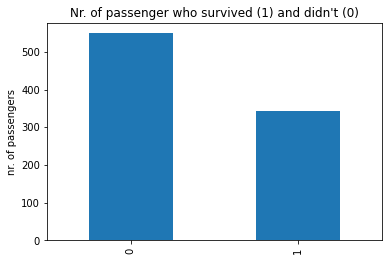

In [8]:
# Step 2: Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

train['Survived'].value_counts().plot(kind='bar', title='Nr. of passenger who survived (1) and didn\'t (0)', ylabel='nr. of passengers')

In [9]:
# Step 3: Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

# class1 passengers
(train['Pclass']==1).sum()

216

<AxesSubplot:title={'center':'Nr. of passengers in each class'}, ylabel='nr. of passengers'>

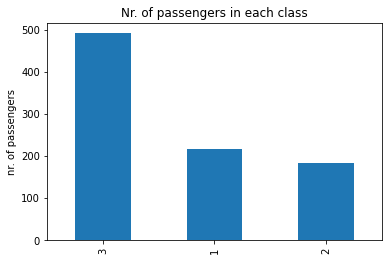

In [11]:
train['Pclass'].value_counts().plot(kind='bar', title='Nr. of passengers in each class', ylabel='nr. of passengers')

In [10]:
# survivors
(train['Survived']==1).sum()

342

In [10]:
# proportion of class1 survivors to class1 passengers

((((train['Pclass']==1) & (train['Survived']==1)).sum()) / (train['Pclass']==1).sum()) 

0.6296296296296297

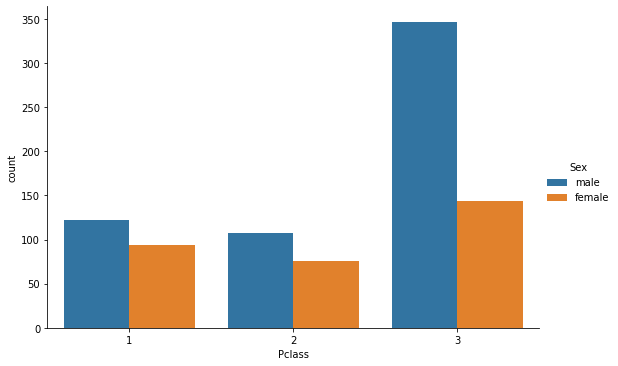

In [11]:
# Step 4: Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

sns.catplot(x='Pclass', hue='Sex', kind="count", data=train, height=5, aspect=1.5)

<AxesSubplot:>

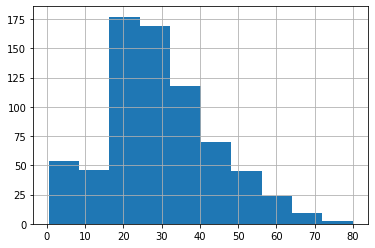

In [12]:
# Step 5: Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

train['Age'].hist(bins=10)

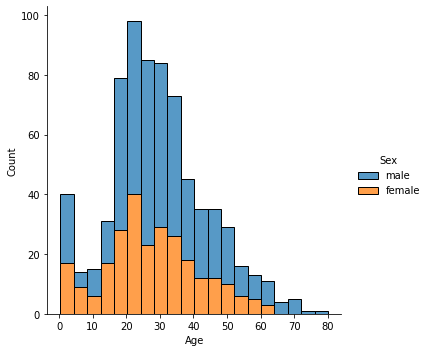

In [13]:
sns.displot(train, x="Age", hue='Sex', multiple='stack')

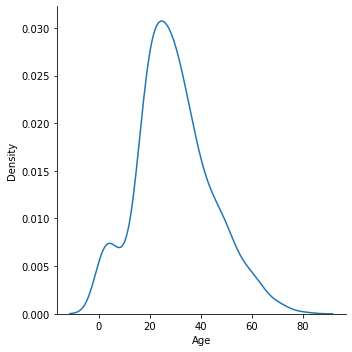

In [14]:
sns.displot(train, x="Age", kind='kde')

In [15]:
# Step 6: Calculate the average age for survived and drowned passengers separately.

train.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

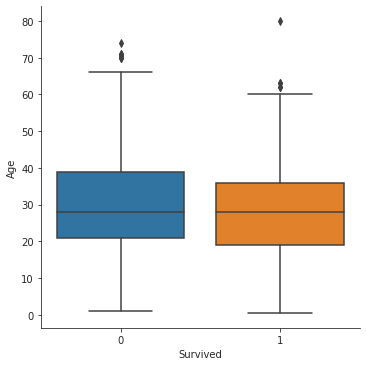

In [16]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('Survived', 'Age',  data=train, kind='box')
    g.set_axis_labels('Survived', 'Age')

In [12]:
# Step 7: Replace missing age values by the median age.

train['Age'].fillna((train['Age'].median()), inplace=True)

In [13]:
train['Age'] = train['Age'].astype('int')
train['Age'].dtypes

dtype('int64')

In [14]:
# Step 8: Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

pd.DataFrame(train.groupby(['Pclass', 'Sex', 'Survived']).size())

0
Pclass Sex    Survived     
1      female 0           3
              1          91
       male   0          77
              1          45
2      female 0           6
              1          70
       male   0          91
              1          17
3      female 0          72
              1          72
       male   0         300
              1          47

In [104]:
# analyze the fare distribution

train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:>

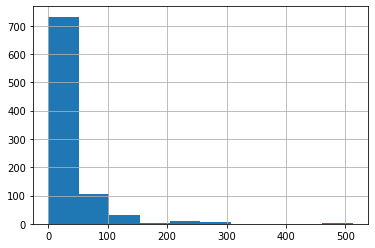

In [105]:
train['Fare'].hist()

In [107]:
train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

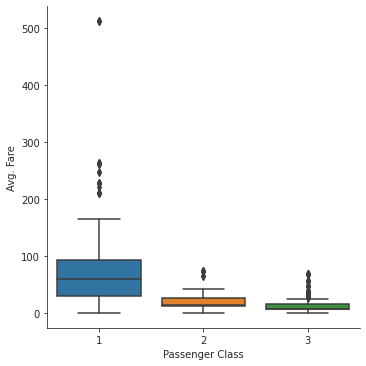

In [110]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('Pclass', 'Fare',  data=train, kind='box')
    g.set_axis_labels('Passenger Class', 'Avg. Fare')

## Data cleaning

### Missing values

In [20]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [40]:
# fill in the two missing value in Embarked with the most common value (S)

train['Embarked'] = train['Embarked'].fillna('S') 

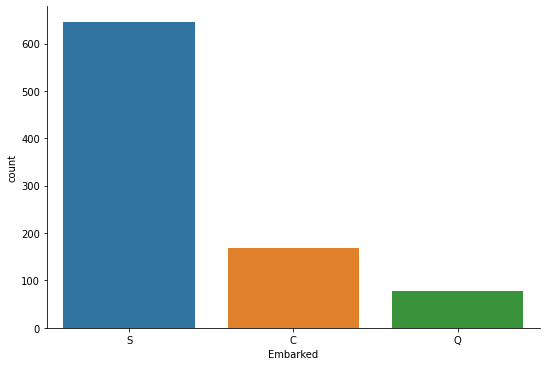

In [41]:
# plot the nr of paassengers who embarked in each port

sns.catplot(x='Embarked', kind="count", data=train, height=5, aspect=1.5)

In [42]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Cabin_code     0
dtype: int64

### Cabin
The cabin code represents its distance from the sea level, and it might play a role in the survival rate.

In [24]:
train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
C22 C26        3
              ..
A24            1
C103           1
C110           1
B73            1
C106           1
Name: Cabin, Length: 147, dtype: int64

In [35]:
train['Cabin'] = train['Cabin'].str[0]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22,1,0,A/5 21171,7.2500,O,S
1,2,1,1,Mrs,female,38,1,0,PC 17599,71.2833,C,C
2,3,1,3,Miss,female,26,0,0,STON/O2. 3101282,7.9250,O,S
3,4,1,1,Mrs,female,35,1,0,113803,53.1000,C,S
4,5,0,3,Mr,male,35,0,0,373450,8.0500,O,S


In [33]:
# the missing values in the cabin column might be due to the fact that some passengers were not assigned a cabin. 
# fill in NaN with O 

train['Cabin'] = train['Cabin'].replace(np.nan, 'O', regex=True)
train['Cabin'].value_counts()

O              687
C23 C25 C27      4
B96 B98          4
G6               4
E101             3
              ... 
D19              1
C148             1
E36              1
E50              1
E40              1
Name: Cabin, Length: 148, dtype: int64

In [36]:
# check the unique cabin types

train['Cabin'].value_counts()

O    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [34]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

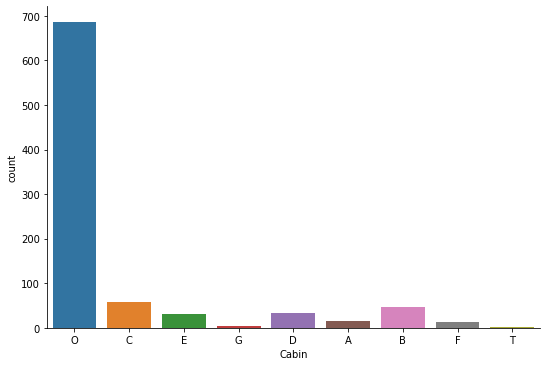

In [28]:
# plot the nr. of passengers in each cabin code

sns.catplot(x='Cabin', kind="count", data=train, height=5, aspect=1.5)

### Names
The names of the passengers include their titles, which might be relevant for the prediction model.

In [15]:
# extract the characters between , and . ()

import re 

train['Name'] = train['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,Rev,male,27,0,0,211536,13.00,NaN,S
887,888,1,1,Miss,female,19,0,0,112053,30.00,B42,S
888,889,0,3,Miss,female,28,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,Mr,male,26,0,0,111369,30.00,C148,C
890,891,0,3,Mr,male,32,0,0,370376,7.75,NaN,Q


In [16]:
# check the unique titles

train['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [17]:
train['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Sir               1
Mme               1
Lady              1
the Countess      1
Don               1
Capt              1
Jonkheer          1
Ms                1
Name: Name, dtype: int64

In [18]:
# keep only the 4 most common titles and encode them 

train['Name'] = np.where(train['Name'].isin(['Mr','Mrs','Miss','Master']), train['Name'], 'Other')

In [19]:
train['Name'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Name, dtype: int64

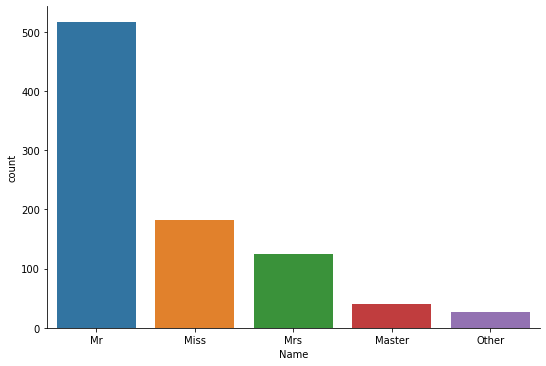

In [21]:
# plot the nr. of passengers by their title, in descending order

sns.catplot(x='Name', kind="count", data=train, height=5, aspect=1.5, order=train['Name'].value_counts().index)

A note on the meaning of honorifics:
- Mr:  a man without a higher or honorific or professional title.
- Mrs: a married woman without a higher or honorific or professional title.
- Miss: an unmarried woman or girl.
- Master: a boy or young man.

In [23]:
# check again the data types

train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Age

In [24]:
train['Age'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 70,
       71, 74, 80])

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

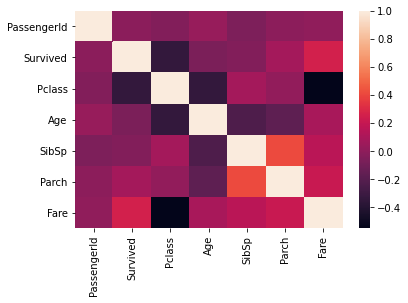

In [26]:
# correlation matrix for the features

sns.heatmap(train.corr())

## Feature engineering
Process categorical variables and encode them  

In [37]:
# encode the Cabin
le = LabelEncoder()

train['Cabin_code'] = le.fit_transform(train['Cabin'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_code
0,1,0,3,Mr,male,22,1,0,A/5 21171,7.2500,O,S,7
1,2,1,1,Mrs,female,38,1,0,PC 17599,71.2833,C,C,2
2,3,1,3,Miss,female,26,0,0,STON/O2. 3101282,7.9250,O,S,7
3,4,1,1,Mrs,female,35,1,0,113803,53.1000,C,S,2
4,5,0,3,Mr,male,35,0,0,373450,8.0500,O,S,7


In [43]:
train['Embarked_code'] = le.fit_transform(train['Embarked'])
train['Name_code'] = le.fit_transform(train['Name'])
train['Sex_code'] = le.fit_transform(train['Sex'])

In [41]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(train[['Embarked_code']]).toarray())
# merge with main df bridge_df on key values
train = train.join(enc_df)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_code,Embarked_code,Name_code,Sex_code,0,1,2
0,1,0,3,Mr,male,22,1,0,A/5 21171,7.2500,O,S,7,2,2,1,0.0,0.0,1.0
1,2,1,1,Mrs,female,38,1,0,PC 17599,71.2833,C,C,2,0,3,0,1.0,0.0,0.0
2,3,1,3,Miss,female,26,0,0,STON/O2. 3101282,7.9250,O,S,7,2,1,0,0.0,0.0,1.0
3,4,1,1,Mrs,female,35,1,0,113803,53.1000,C,S,2,2,3,0,0.0,0.0,1.0
4,5,0,3,Mr,male,35,0,0,373450,8.0500,O,S,7,2,2,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Other,male,27,0,0,211536,13.0000,O,S,7,2,4,1,0.0,0.0,1.0
887,888,1,1,Miss,female,19,0,0,112053,30.0000,B,S,1,2,1,0,0.0,0.0,1.0
888,889,0,3,Miss,female,28,1,2,W./C. 6607,23.4500,O,S,7,2,1,0,0.0,0.0,1.0
889,890,1,1,Mr,male,26,0,0,111369,30.0000,C,C,2,0,2,1,1.0,0.0,0.0


In [42]:
fe = ColumnTransformer([('encoder', OneHotEncoder(), ['Sex'])]) 

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_code,Embarked_code,Name_code,Sex_code,0,1,2
0,1,0,3,Mr,male,22,1,0,A/5 21171,7.2500,O,S,7,2,2,1,0.0,0.0,1.0
1,2,1,1,Mrs,female,38,1,0,PC 17599,71.2833,C,C,2,0,3,0,1.0,0.0,0.0
2,3,1,3,Miss,female,26,0,0,STON/O2. 3101282,7.9250,O,S,7,2,1,0,0.0,0.0,1.0
3,4,1,1,Mrs,female,35,1,0,113803,53.1000,C,S,2,2,3,0,0.0,0.0,1.0
4,5,0,3,Mr,male,35,0,0,373450,8.0500,O,S,7,2,2,1,0.0,0.0,1.0


In [44]:
# encode the age into three categories (young-adult-senior)

fe = ColumnTransformer([('Age_trans', KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='uniform'), ['Age'])])

In [29]:
#fe.fit(train)
#result = fe.transform(train)

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_code,Embarked_code,Name_code,Sex_code
0,1,0,3,Mr,male,22,1,0,A/5 21171,7.2500,O,S,7,2,2,1
1,2,1,1,Mrs,female,38,1,0,PC 17599,71.2833,C,C,2,0,3,0
2,3,1,3,Miss,female,26,0,0,STON/O2. 3101282,7.9250,O,S,7,2,1,0
3,4,1,1,Mrs,female,35,1,0,113803,53.1000,C,S,2,2,3,0
4,5,0,3,Mr,male,35,0,0,373450,8.0500,O,S,7,2,2,1


In [48]:
#k = fe.named_transformers_['Age_trans']
#k.bin_edges_

## Splitting data into train and test set

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
X = train[['Pclass','Age','SibSp','Parch','Cabin_code','Name_code','Sex_code']]
y = train['Survived']

In [49]:
print(y.shape, X.shape)

(891,) (891, 7)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% test, 80%train

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [52]:
X_train.head()

,Pclass,Age,SibSp,Parch,Cabin_code,Name_code,Sex_code
331,1,45,0,0,2,2,1
733,2,23,0,0,7,2,1
382,3,32,0,0,7,2,1
704,3,26,1,0,7,2,1
813,3,6,4,2,7,1,0


In [55]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

# Classification models

## Logistic Regression

In [53]:
# create a model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [54]:
# train the model with training data

lr.fit(X_train, y_train)

LogisticRegression()

In [62]:
lr.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

### Evaluate the model

In [55]:
# calculate the accuracy of the train set

round(lr.score(X_train, y_train),3)

0.794

In [56]:
# calculate the accuracy of the test set

round(lr.score(X_test, y_test),3)

0.827

In [57]:
import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(y, X)
f = logit.fit()
print(f.params)
print(f.summary())

Optimization terminated successfully.
         Current function value: 0.525017
         Iterations 6
Pclass       -0.268863
Age           0.014502
SibSp        -0.107015
Parch         0.121501
Cabin_code    0.058773
Name_code     0.265387
Sex_code     -2.157594
dtype: float64
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Fri, 09 Oct 2020   Pseudo R-squ.:                  0.2116
Time:                        09:06:33   Log-Likelihood:                -467.79
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.418e-51
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------

The p-value indicates that the SibSp, Parch, Cabin_code, and Embarked_code are not significant features for predicting the survival rate.

In [58]:
#Print the coefficients calculated by the model.

lr.coef_, lr.intercept_

(array([[-0.84823211, -0.03110132, -0.30101379, -0.09552403, -0.10606066,
         -0.03641249, -2.61770757]]),
 array([4.83414129]))

In [59]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

## Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
X = train[['Pclass','Age','SibSp','Parch','Name_code','Sex_code']]
y = train['Survived']

In [97]:
dt = DecisionTreeClassifier(max_depth=4) #try diff depths; score improves with
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [78]:
round(dt.score(X_train, y_train), 3)

0.841

In [71]:
round(dt.score(X_test, y_test), 3)

0.788

In [72]:
dt.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0])

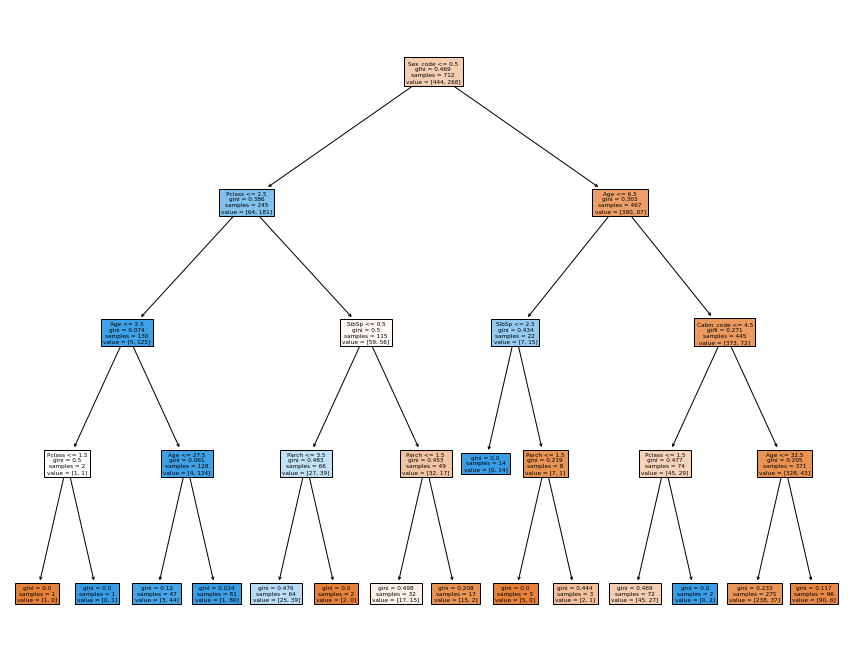

In [98]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 12))
plot_tree(dt, feature_names=['Pclass','Age','SibSp','Parch','Cabin_code','Name_code','Sex_code'], filled=True)
None 

## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
Y_pred = random_forest.predict(X_test)
Y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0])

In [84]:
round(random_forest.score(X_train, y_train), 3)

0.934

In [85]:
round(random_forest.score(X_test, y_test), 3)

0.804

## Support Vector Classifier (SVC)

In [86]:
from sklearn.svm import SVC

# train a classifier
svc = SVC(kernel='rbf', C=0.1)
svc.fit(X, y)
round(svc.score(X, y),3)

0.616

## Cross-Validation

In [87]:
from sklearn.model_selection import cross_val_score

precision = cross_val_score(dt, X, y, cv=5, scoring='precision')
recall = cross_val_score(dt, X, y, cv=5, scoring='recall')
print("cross-validation scores DT \n", "precision: ", precision, "\n recall: ", recall)

cross-validation scores DT 
 precision:  [0.79411765 0.81355932 0.8        0.79245283 0.83870968] 
 recall:  [0.76811594 0.70588235 0.76470588 0.61764706 0.75362319]


## Ensemble Model

In [88]:
from sklearn.ensemble import VotingClassifier

models = [
          ('log_reg', LogisticRegression()),
          ('decision_tree', DecisionTreeClassifier()),
          ('random_forest', RandomForestClassifier())
]

ensemble = VotingClassifier(models)

ensemble.fit(X, y)
round(ensemble.score(X, y),3)

0.933

## Evaluating classifiers

In [89]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [90]:
print(
    "accuracy:", round(accuracy_score(y_test, Y_pred),3), 
    "\npresision:", round(precision_score(y_test, Y_pred),3),
    "\nrecall:", round(recall_score(y_test, Y_pred),3),
    "\nf1-score:", round(f1_score(y_test, Y_pred),3)
    )

accuracy: 0.804 
presision: 0.76 
recall: 0.77 
f1-score: 0.765


In [91]:
confusion_matrix(y_true=y_test, y_pred=Y_pred)

array([[87, 18],
       [17, 57]])

In [92]:
output = pd.DataFrame({'actual': y_test, 'predicted': Y_pred})
output.to_csv('predictions.csv', index=False)
print("The prediction output was successfully saved.")

The prediction output was successfully saved.
